<img src="UAS_logo.png" style="width:200px;height:200px;float:left;margin-right:12%;"><img src="Logo_FIC.jpg" style="width:200px;height:200px;float:right;margin-left:5%;"><h1 style="margin-top:7%;">Actividad - Proyecto KNN - Clasificacion Tierra y Agua</h1>

### Grupo: 4-5


### Integrantes:
1. Castillo Verdugo Alan Fernando
2. Ochoa Vidales Erick

Importar librerias para analisis de datos y despliegue de imagenes

In [1]:
import numpy as np
import math
import operator 
import matplotlib.pyplot as plt
from IPython.display import clear_output

Procesar Archivo rsTrain.dat que contiene los datos de entrenamiento y convertirlos a valores enteros de dos digitos

In [147]:
datosEnt = np.loadtxt('rsTrain.dat')
datosEntrenamiento = datosEnt.astype(int)

+ Abrir archivos de las distintas bandas que contienen la imagen a clasificar
+ Parcear binarios a lista para convertirlos a enteros de doble digito

In [149]:
banda1 = list(open("band1.irs", "rb").read())
banda2 = list(open("band2.irs", "rb").read())
banda3 = list(open("band3.irs", "rb").read())
banda4 = list(open("band4.irs", "rb").read())

### Metodo distancia Euclidia

Obtener distancias Euclidiana Sumando todas las distancias de las operaciones de las bandas con respecto a cada columna del archivo rsTrain.dat y sacar raiz cuadrada, retornando dicha distancia

In [150]:
def distanciaEuclidiana(pixelBanda, datosClasificado, tamañoDatAClas):
    distancia = 0
    for x in range(tamañoDatAClas):
        distancia += pow((pixelBanda[x] - datosClasificado[x]), 2)
    return math.sqrt(distancia)

### Metodo Vecinos mas Cercanos KNN

1. Recibimos los datos de entrenamiento y los datos a clasificar asi como su valor de K
2. Sacar las distancias respecto a los 200 puntos de cada pixel de cada banda(datosAClasificar contiene los 4 valores de cada una de las bandas que conforman un solo pixel)
3. Obtener distancias en una lista respecto a cada dato de entrenamiento y reordenar
4. Obtener los valores de K vecinos y retornar la lista con los mismos

In [151]:
def getVecinos(datosdeEntrenamiento, datosAClasificar, k):
    distancias = []
    for x in range(len(datosdeEntrenamiento)):
        dist = distanciaEuclidiana(datosAClasificar, datosdeEntrenamiento[x], len(datosAClasificar)-1)
        distancias.append((datosdeEntrenamiento[x], dist))
    distancias.sort(key=operator.itemgetter(1))
    vecinos = []
    for x in range(k):
        vecinos.append(distancias[x][0])
    return vecinos

1. Tomar los valores un valor de cada banda en la posicion X
2. Sacar los vecinos de dicho Pixel
3. Sacar el valor predominante de K
4. Asignar un 1 o 0 segun agua o tierra
5. Criterio de desempate - Tomar el valor con menor distancia respecto al Pixel

In [152]:
listaBandasClasificar=[]
listaBitsImagen=[]
k=20

for x in range(262144):
    tierra=0
    agua=0
    listaBandasClasificar.clear()
    listaBandasClasificar.insert(0,banda1[x])
    listaBandasClasificar.insert(1,banda2[x])
    listaBandasClasificar.insert(2,banda3[x])
    listaBandasClasificar.insert(3,banda4[x])
    vecinos = getVecinos(datosEntrenamiento, listaBandasClasificar, k)
    for x in range(len(vecinos)):
        if vecinos[x][4] == 0:
            tierra += 1
        if vecinos[x][4] == 1:
            agua += 1
    if tierra>agua:
        listaBitsImagen.append(0)
    elif agua>tierra:
        listaBitsImagen.append(1)
    else:
        listaBitsImagen.append(vecinos[0][4])

Metodo para guardar listadeBitsClasificados como Imagen 512 x 512 en escala de negros

In [153]:
plt.imsave('KolkataConK20.jpg', np.array(listaBitsImagen).reshape(512,512),cmap=cm.gray)

### Captura cuando el valor de K = 3

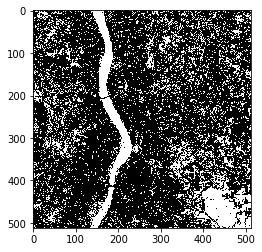

In [154]:
img = plt.imread("KolkataConK3.jpg")
plt.imshow(img, cmap='gray')
plt.show() 

### Captura cuando el valor de K = 5

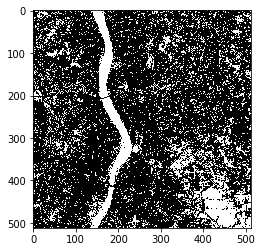

In [155]:
img = plt.imread("KolkataConK5.jpg")
plt.imshow(img, cmap='gray')
plt.show() 

### Captura cuando el valor de K = 7

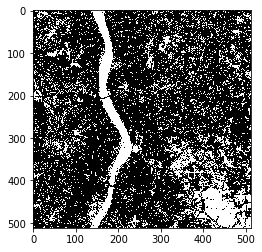

In [156]:
img = plt.imread("KolkataConK7.jpg")
plt.imshow(img, cmap='gray')
plt.show() 

### Captura cuando el valor de K = 15

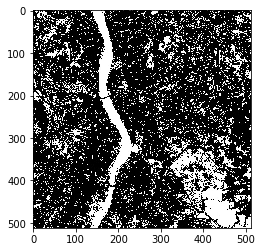

In [157]:
img = plt.imread("KolkataConK15.jpg")
plt.imshow(img, cmap='gray')
plt.show() 

### Captura cuando el valor de K = 20

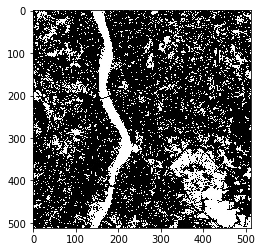

In [158]:
img = plt.imread("KolkataConK20.jpg")
plt.imshow(img, cmap='gray')
plt.show() 
